In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
def percent_scaling(series):
    return (series / 100)

def cpu_scaling(series):
    return (series * 4 / 100)

def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

In [3]:
cpu_df = pd.read_csv('../results/cycle_cpu.csv')

cpu_df['cpu_percent'] = percent_scaling(cpu_df['cpu_percent'])
cpu_df['virtual_memory'] = percent_scaling(cpu_df['virtual_memory'])
cpu_df['adc_voltage_norm'] = percent_scaling(cpu_df['adc_voltage'])

cpu_df

,time,cpu_percent,virtual_memory,adc_voltage,adc_voltage_norm
0,2023-04-26 14:03:21.304178,0.254,0.216,0.127629,0.001276
1,2023-04-26 14:03:21.320244,0.000,0.216,0.104753,0.001048
2,2023-04-26 14:03:21.336414,0.000,0.216,0.104253,0.001043
3,2023-04-26 14:03:21.352451,0.000,0.216,0.104753,0.001048
4,2023-04-26 14:03:21.368512,0.000,0.216,0.103003,0.001030
...,...,...,...,...,...
8495,2023-04-26 14:05:39.745443,0.000,0.237,0.103628,0.001036
8496,2023-04-26 14:05:39.761443,0.000,0.237,0.108878,0.001089
8497,2023-04-26 14:05:39.777409,0.000,0.237,0.104253,0.001043
8498,2023-04-26 14:05:39.793450,0.000,0.237,0.104753,0.001048


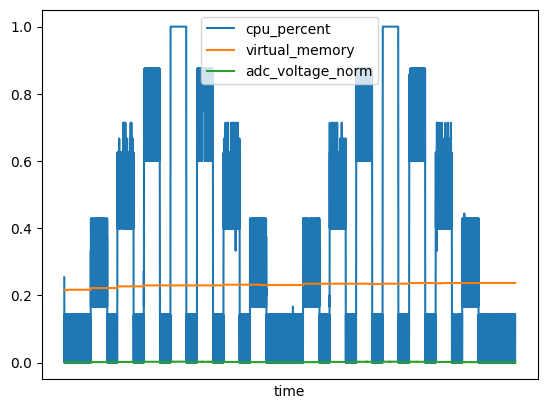

In [4]:
cpu_df_plot = cpu_df.plot(x='time', y=['cpu_percent','virtual_memory','adc_voltage_norm'])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
cpu_df_plot.get_figure().savefig('cpu_stress_test.pdf', format='pdf')

In [5]:
cpu_df.drop('time', axis=1).corr()

,cpu_percent,virtual_memory,adc_voltage,adc_voltage_norm
cpu_percent,1.000000,0.142820,0.969186,0.969186
virtual_memory,0.142820,1.000000,0.149364,0.149364
adc_voltage,0.969186,0.149364,1.000000,1.000000
adc_voltage_norm,0.969186,0.149364,1.000000,1.000000


In [6]:
cpu_pca = PCA(n_components=4)
cpu_pca.fit(cpu_df.drop('time', axis=1))
cpu_pca.components_

array([[ 9.82797524e-01,  2.23642796e-03,  1.84663521e-01,
         1.84663521e-03],
       [ 1.84684337e-01, -1.65053704e-02, -9.82610155e-01,
        -9.82610155e-03],
       [-8.50445515e-04, -9.99861276e-01,  1.66336387e-02,
         1.66336387e-04],
       [ 2.13291171e-17,  1.94279397e-17,  9.99950004e-03,
        -9.99950004e-01]])

In [7]:
mem_df = pd.read_csv('../results/cycle_mem.csv')

mem_df['cpu_percent'] = percent_scaling(mem_df['cpu_percent'])
mem_df['virtual_memory'] = percent_scaling(mem_df['virtual_memory'])
mem_df['adc_voltage_norm'] = min_max_scaling(mem_df['adc_voltage'])

mem_df

,time,cpu_percent,virtual_memory,adc_voltage,adc_voltage_norm
0,2023-04-11 16:42:11.932995,0.165,0.250,0.151005,0.184010
1,2023-04-11 16:42:11.955088,0.000,0.250,0.099128,0.008460
2,2023-04-11 16:42:11.971054,0.000,0.250,0.102378,0.019459
3,2023-04-11 16:42:11.987074,0.000,0.250,0.101378,0.016074
4,2023-04-11 16:42:12.002988,0.000,0.250,0.100253,0.012267
...,...,...,...,...,...
8495,2023-04-11 16:44:31.788538,0.000,0.189,0.100503,0.013113
8496,2023-04-11 16:44:31.804511,0.143,0.189,0.100253,0.012267
8497,2023-04-11 16:44:31.820675,0.000,0.189,0.100628,0.013536
8498,2023-04-11 16:44:31.836613,0.000,0.189,0.103503,0.023266


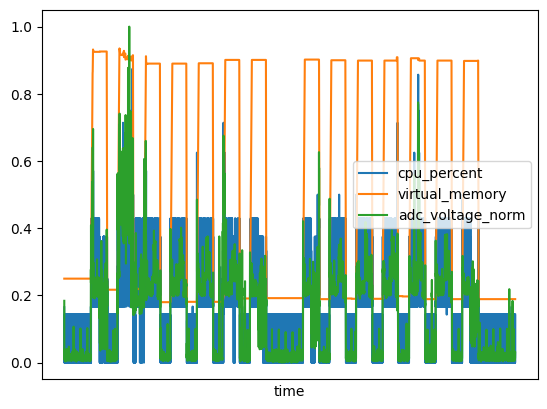

In [8]:
mem_df_plot = mem_df.plot(x='time', y=['cpu_percent','virtual_memory','adc_voltage_norm'])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
mem_df_plot.get_figure().savefig('mem_stress_test.pdf', format='pdf')

In [9]:
mem_df.drop('time', axis=1).corr()

,cpu_percent,virtual_memory,adc_voltage,adc_voltage_norm
cpu_percent,1.000000,0.692906,0.769402,0.769402
virtual_memory,0.692906,1.000000,0.774211,0.774211
adc_voltage,0.769402,0.774211,1.000000,1.000000
adc_voltage_norm,0.769402,0.774211,1.000000,1.000000


In [10]:
mem_pca = PCA(n_components=4)
mem_pca.fit(mem_df.drop('time', axis=1))
mem_pca.components_

array([[ 3.28637566e-01,  8.91940030e-01,  8.80076225e-02,
         2.97817045e-01],
       [ 8.01501638e-01, -4.37319438e-01,  1.15584129e-01,
         3.91135709e-01],
       [-4.99592308e-01, -1.14868153e-01,  2.43325363e-01,
         8.23410955e-01],
       [-0.00000000e+00, -4.30513799e-17,  9.59003512e-01,
        -2.83394186e-01]])

In [11]:
both_df = pd.read_csv('../results/cycle_both.csv')

both_df['cpu_percent'] = percent_scaling(both_df['cpu_percent'])
both_df['virtual_memory'] = percent_scaling(both_df['virtual_memory'])
both_df['adc_voltage_norm'] = min_max_scaling(both_df['adc_voltage'])

both_df

,time,cpu_percent,virtual_memory,adc_voltage,adc_voltage_norm
0,2023-04-26 14:06:51.515135,0.184,0.226,0.163130,0.196749
1,2023-04-26 14:06:51.537342,0.000,0.226,0.121504,0.054320
2,2023-04-26 14:06:51.553483,0.000,0.226,0.115879,0.035073
3,2023-04-26 14:06:51.569508,0.000,0.226,0.117504,0.040633
4,2023-04-26 14:06:51.585658,0.143,0.226,0.116129,0.035928
...,...,...,...,...,...
4295,2023-04-26 14:08:03.998038,0.000,0.156,0.113003,0.025235
4296,2023-04-26 14:08:04.014044,0.143,0.156,0.107878,0.007699
4297,2023-04-26 14:08:04.030002,0.000,0.156,0.108253,0.008982
4298,2023-04-26 14:08:04.046017,0.143,0.156,0.107753,0.007271


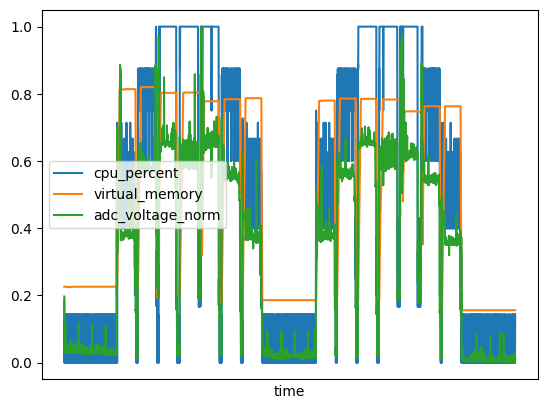

In [12]:
both_df_plot = both_df.plot(x='time', y=['cpu_percent','virtual_memory','adc_voltage_norm'])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

both_df_plot.get_figure().savefig('merged_stress_test.pdf', format='pdf')

In [13]:
both_df.drop('time', axis=1).corr()

,cpu_percent,virtual_memory,adc_voltage,adc_voltage_norm
cpu_percent,1.000000,0.846077,0.966865,0.966865
virtual_memory,0.846077,1.000000,0.852707,0.852707
adc_voltage,0.966865,0.852707,1.000000,1.000000
adc_voltage_norm,0.966865,0.852707,1.000000,1.000000


In [14]:
fftw_df = pd.read_csv('../results/fftw.csv')

fftw_df['cpu_percent'] = cpu_scaling(fftw_df['cpu_percent'])
fftw_df['virtual_memory'] = percent_scaling(fftw_df['virtual_memory'])
fftw_df['adc_voltage_norm'] = min_max_scaling(fftw_df['adc_voltage'])

fftw_df

,time,cpu_percent,virtual_memory,adc_voltage,adc_voltage_norm
0,2023-05-02 11:35:55.657983,0.836,0.218,0.245007,0.477371
1,2023-05-02 11:35:55.680271,0.572,0.218,0.216882,0.234914
2,2023-05-02 11:35:55.696432,0.000,0.218,0.220882,0.269397
3,2023-05-02 11:35:55.712558,0.572,0.218,0.217632,0.241379
4,2023-05-02 11:35:55.728665,0.572,0.218,0.218257,0.246767
...,...,...,...,...,...
9495,2023-05-02 11:38:29.900786,0.000,0.217,0.195756,0.052802
9496,2023-05-02 11:38:29.916857,0.000,0.217,0.195256,0.048491
9497,2023-05-02 11:38:29.932871,0.000,0.217,0.195881,0.053879
9498,2023-05-02 11:38:29.948930,0.000,0.217,0.198256,0.074353


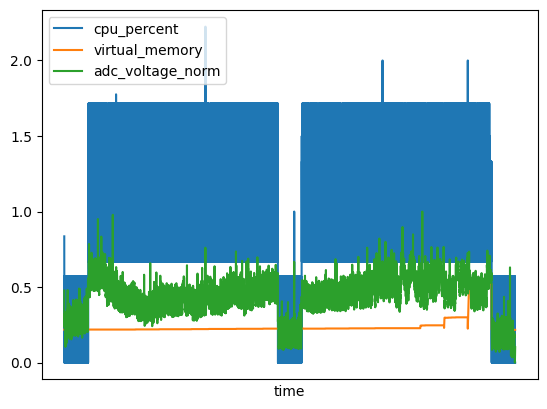

In [15]:
fftw_df.plot(x='time', y=['cpu_percent','virtual_memory','adc_voltage_norm'])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)



In [16]:
fftw_df.drop('time', axis=1).corr()

,cpu_percent,virtual_memory,adc_voltage,adc_voltage_norm
cpu_percent,1.000000,0.114069,0.502632,0.502632
virtual_memory,0.114069,1.000000,0.163400,0.163400
adc_voltage,0.502632,0.163400,1.000000,1.000000
adc_voltage_norm,0.502632,0.163400,1.000000,1.000000


In [17]:
fftw_pca = PCA(n_components=4)
fftw_pca.fit(fftw_df.drop('time', axis=1))
fftw_pca.components_

array([[ 9.90341816e-01,  1.55110911e-02,  1.58761522e-02,
         1.36859205e-01],
       [-1.38641886e-01,  1.01965943e-01,  1.13511495e-01,
         9.78517508e-01],
       [-1.23109697e-03,  9.94666956e-01, -1.18839407e-02,
        -1.02444638e-01],
       [-1.48491655e-17, -1.11114017e-17, -9.93338744e-01,
         1.15230811e-01]])